In [1]:
from librosa import load
from librosa.display import specshow
from scipy.signal import spectrogram, butter, lfilter, freqz
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import time

In [2]:
def plot_spect(samples, sr, ax, title):
    f, t, spect = spectrogram(x = samples, fs = sr)
    ax.pcolormesh(t, f, spect)
    ax.imshow(np.log(spect)[::-1])
    ax.set_title(title)
    
    return f, t, spect

In [3]:
def plot_thresh(plot_ax, ref_ax, xs, ys, title, thresh, ylim):
    '''
    Plot samples and threshold values on an axis
    
    In a plot with shape (x, 1), plot samples array on 
    a subplot axis, plot_ax, sized to match the position and
    width of the top subplot axis, ref_ax.
    
    Args:
        plot_ax (matplotlib axis): axis to plot on
        ref_ax (matplotlib axis): reference axis to plot beneath.
            assumes that plot_ax and ref_ax share x axis.
        xs (np.ndarray): x values for samples array
        ys (np.ndarray): samples array
        title (str): desired title of plot
    '''
    
    # Plot samples
    plot_ax.plot(xs, ys)

    # Positioning and title
    pos0 = ref_ax.get_position(original=False)
    pos1 = plot_ax.get_position(original=False)
    plot_ax.set_position([pos0.x0, pos1.y0, pos0.width, pos1.height])
    plot_ax.set_ylim(ylim)
    plot_ax.set_title(title)
    
    # Make hlines
    max_y = max(ys)
    if type(thresh) != list:
        thresh = [thresh]
    for idx, t_val in enumerate(thresh):
        if max_y >= t_val:
            plot_ax.axhline(t_val, color = 'r')
        else:
            plot_ax.axhline(t_val)
        

In [4]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff = 0.5, fs = 10, order = 5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

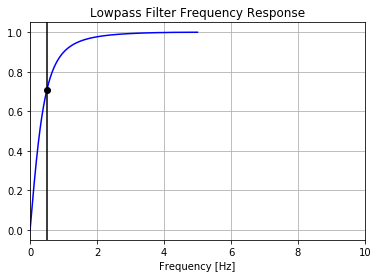

In [5]:
order = 1
cutoff = 0.5 #3.667  # desired cutoff frequency of the filter, Hz
fs = 10

b, a = butter_highpass(cutoff, fs, order)
# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.xlim((0, 10))
plt.grid()

In [6]:
def window_energy(samples, nperseg = 256, noverlap = 128):
    def _energy(samples):
        return np.sum(samples**2)/len(samples)
    
    windowed = []
    skip = nperseg - noverlap
    for start in range(0, len(samples), skip):
        window_energy = _energy(samples[start : start + nperseg])
        windowed.append(window_energy)

    return windowed

In [7]:
def plot_file(
    filename,
    smoothing_factor = 10,
    nperseg = 256,
    noverlap = 128,
    thresh = [0.05]
):

    samples, sr = load(filename, duration = 6)
    windowed = window_energy(samples, nperseg*smoothing_factor, noverlap)
    norm_factor = np.mean(windowed)
    ys = (windowed - norm_factor)*100
    print(f'{filename}, {int(np.max(ys) > thresh[0])}')
    
    # Plot comparison of spectrogram and normalized energy
    #fig, ax = plt.subplots(2, 1, sharex=True, figsize=(20, 10))
    #f, t, spect = plot_spect(samples, sr, ax[0], title = f"normal: {filename}")
    #xs = np.linspace(start = 0, stop = spect.shape[1], num=len(ys))
    #ylim = (0, 1)
    #plot_thresh(
    #    plot_ax = ax[1], ref_ax = ax[0], xs = xs, ys = ys,
    #    title = None, thresh = thresh, ylim = (0, 0.1))
   

In [10]:
t0 = time.time()
tyto_path = '/Volumes/seagate4/xeno-canto/aba_code_1-2/tyto-furcata/mp3s/421206.mp3'    
aba_path = '/Volumes/seagate4/xeno-canto/aba_code_1-2/'
species_dirs = [os.path.join(aba_path, d, 'mp3s/') for d in os.listdir(aba_path) if os.path.isdir(os.path.join(aba_path, d))]
filenames = []
for species_dir in species_dirs:
    random.seed(1)
    try:
        mp3_name = random.choice(os.listdir(species_dir))
        filenames.append(os.path.join(species_dir, mp3_name))
    except IndexError:
        continue
filenames_to_use = filenames[::10]
for filename in filenames_to_use:
    plot_file(filename)
print(f'Time for {len(filenames_to_use)} files: {time.time() - t0}')

/Volumes/seagate4/xeno-canto/aba_code_1-2/acanthis-flammea/mp3s/171760.mp3, 1
/Volumes/seagate4/xeno-canto/aba_code_1-2/aegolius-funereus/mp3s/168350.mp3, 1
/Volumes/seagate4/xeno-canto/aba_code_1-2/aix-sponsa/mp3s/174542.mp3, 1
/Volumes/seagate4/xeno-canto/aba_code_1-2/ammodramus-bairdii/mp3s/185575.mp3, 1
/Volumes/seagate4/xeno-canto/aba_code_1-2/anas-fulvigula/mp3s/130934.mp3, 1
/Volumes/seagate4/xeno-canto/aba_code_1-2/anser-rossii/mp3s/452076.mp3, 1
/Volumes/seagate4/xeno-canto/aba_code_1-2/aphelocoma-wollweberi/mp3s/218871.mp3, 1
/Volumes/seagate4/xeno-canto/aba_code_1-2/ardenna-gravis/mp3s/310326.mp3, 1
/Volumes/seagate4/xeno-canto/aba_code_1-2/asio-otus/mp3s/170770.mp3, 0
/Volumes/seagate4/xeno-canto/aba_code_1-2/baeolophus-inornatus/mp3s/149470.mp3, 1
/Volumes/seagate4/xeno-canto/aba_code_1-2/branta-canadensis/mp3s/178943.mp3, 1
/Volumes/seagate4/xeno-canto/aba_code_1-2/buteo-albonotatus/mp3s/190393.mp3, 0
/Volumes/seagate4/xeno-canto/aba_code_1-2/buteogallus-anthracinus/mp3s/

In [11]:
(878674/72)*16

195260.88888888888

In [19]:
# Create a list of files to analyze
species_dirs = [os.path.join(split_path, sp) 
                for sp in os.listdir(split_path)
                if os.path.isdir(os.path.join(split_path, sp))]
filenames = []
for species_dir in species_dirs:
    random.seed(1)
    try:
        filenames.extend(
            [os.path.join(species_dir, mp3_name) 
            for mp3_name in os.listdir(species_dir)]
        )
    except IndexError:
        continue

# Analyze all files and save to dictionary
silence_dict = {}
for filename in filenames:
    silence_dict[filename] = identify_silence(filename)

# Write results to .csv
csv = ''
for filename, value in silence_dict.items():
    line = f"{filename},{value}\n"
    csv += line
csv_name = '/bgfs/jkitzes/xeno-canto-split/silences.csv'
with open(csv_name, 'a') as f:
    f.write('filename,silence_detector_v1\n')
    f.write(csv)